# Введение

В качестве набора данных я выбрал "Seoul Bike Sharing Demand Prediction". Этот датасет содержит почасовые данные о количестве арендованных велосипедов в Сеуле, а также погодные условия и информацию о времени суток/дня недели/праздниках


 В данном исследовании я проанализирую набор данных о почасовой аренде велосипедов в системе общественного велопроката в Сеуле. Целью является понимание факторов, влияющих на спрос, и построение моделей машинного обучения для решения двух задач:

 1.  **Задача регрессии:** Предсказание точного количества арендованных велосипедов в данный час.
 2.  **Задача классификации:** Предсказание категории спроса (например, низкий, средний, высокий).

 Набор данных содержит информацию о дате, времени, погодных условиях (температура, влажность, скорость ветра, видимость, точка росы, солнечное излучение, снегопад, дождь) и количестве арендованных велосипедов.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

import warnings
warnings.filterwarnings('ignore')

## 1. Загрузка и первичный осмотр данных

Данные можно скачать отсюда: https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction


In [3]:
df = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')

In [7]:
print("Первые 5 строк данных:")
display(df.head())
print("\nИнформация о датасете:")
df.info()
print("\nОсновные статистические показатели для числовых признаков:")
display(df.describe().transpose())

Первые 5 строк данных:


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day         

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


**Первичные наблюдения:**
* Датасет содержит 8760 записей (что соответствует 24 часам * 365 дней) и 14 колонок.
* Пропусков в данных нет, судя по `df.info()`.
* `Date` имеет тип object, ее нужно будет преобразовать в datetime.
* Целевая переменная для регрессии - `Rented Bike Count`.
* Признаки `Seasons`, `Holiday`, `Functioning Day` являются категориальными, но представлены как object. Их нужно будет соответствующим образом обработать.

## 2. Разведочный анализ данных (EDA)

### 2.1. Преобразование типов данных и извлечение признаков из даты

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Извлечение дополнительных временных признаков
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek # Понедельник=0, Воскресенье=6
df['Hour'] = df['Hour'] # 'Hour' уже есть, но убедимся что он числовой

### 2.2. Анализ целевой переменной для регрессии (`Rented Bike Count`)

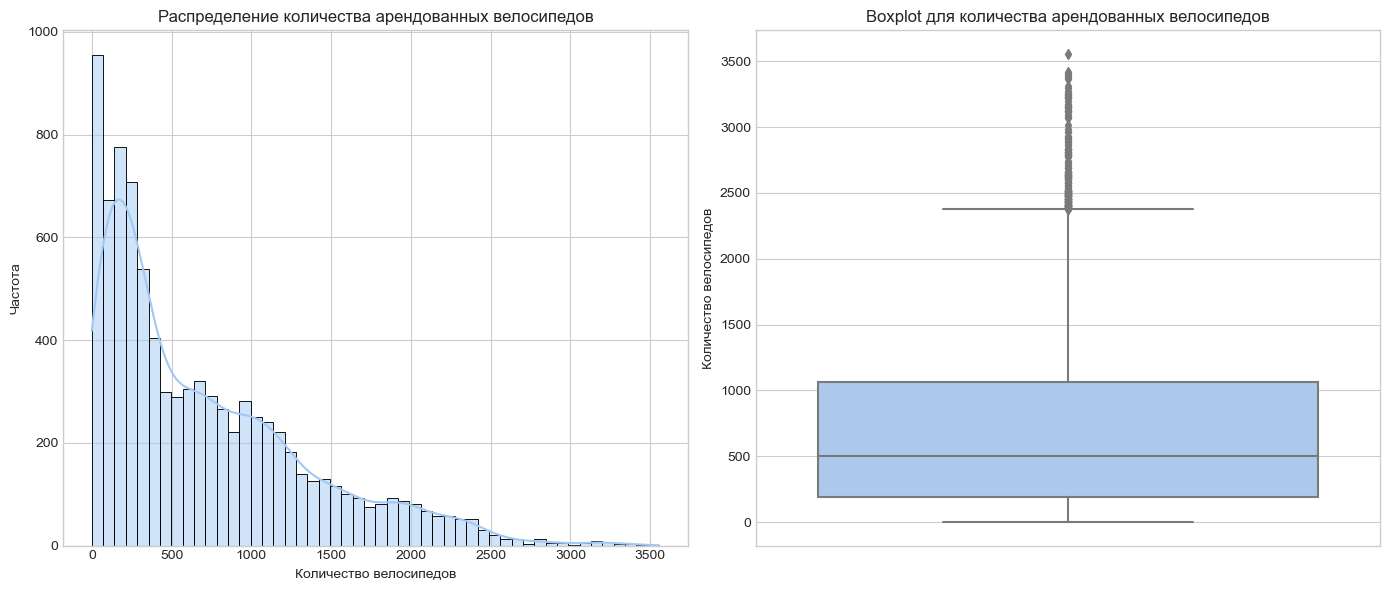

Среднее количество арендованных велосипедов: 704.60
Медианное количество арендованных велосипедов: 504.50
Минимальное количество арендованных велосипедов: 0
Максимальное количество арендованных велосипедов: 3556


In [9]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Rented Bike Count'], kde=True, bins=50)
plt.title('Распределение количества арендованных велосипедов')
plt.xlabel('Количество велосипедов')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Rented Bike Count'])
plt.title('Boxplot для количества арендованных велосипедов')
plt.ylabel('Количество велосипедов')

plt.tight_layout()
plt.show()

print(f"Среднее количество арендованных велосипедов: {df['Rented Bike Count'].mean():.2f}")
print(f"Медианное количество арендованных велосипедов: {df['Rented Bike Count'].median():.2f}")
print(f"Минимальное количество арендованных велосипедов: {df['Rented Bike Count'].min()}")
print(f"Максимальное количество арендованных велосипедов: {df['Rented Bike Count'].max()}")


**Выводы по целевой переменной (`Rented Bike Count`):**
* Распределение скошено, что типично для счетных данных.
* Присутствуют часы с нулевым спросом.
* Медианное значение (504) ниже среднего (704), что также указывает на правостороннюю асимметрию.
* Возможно, для улучшения моделей регрессии потребуется логарифмическое преобразование целевой переменной, но сначала попробуем без него.


### 2.3. Анализ категориальных признаков

Уникальные значения в 'Year': [2017 2018]


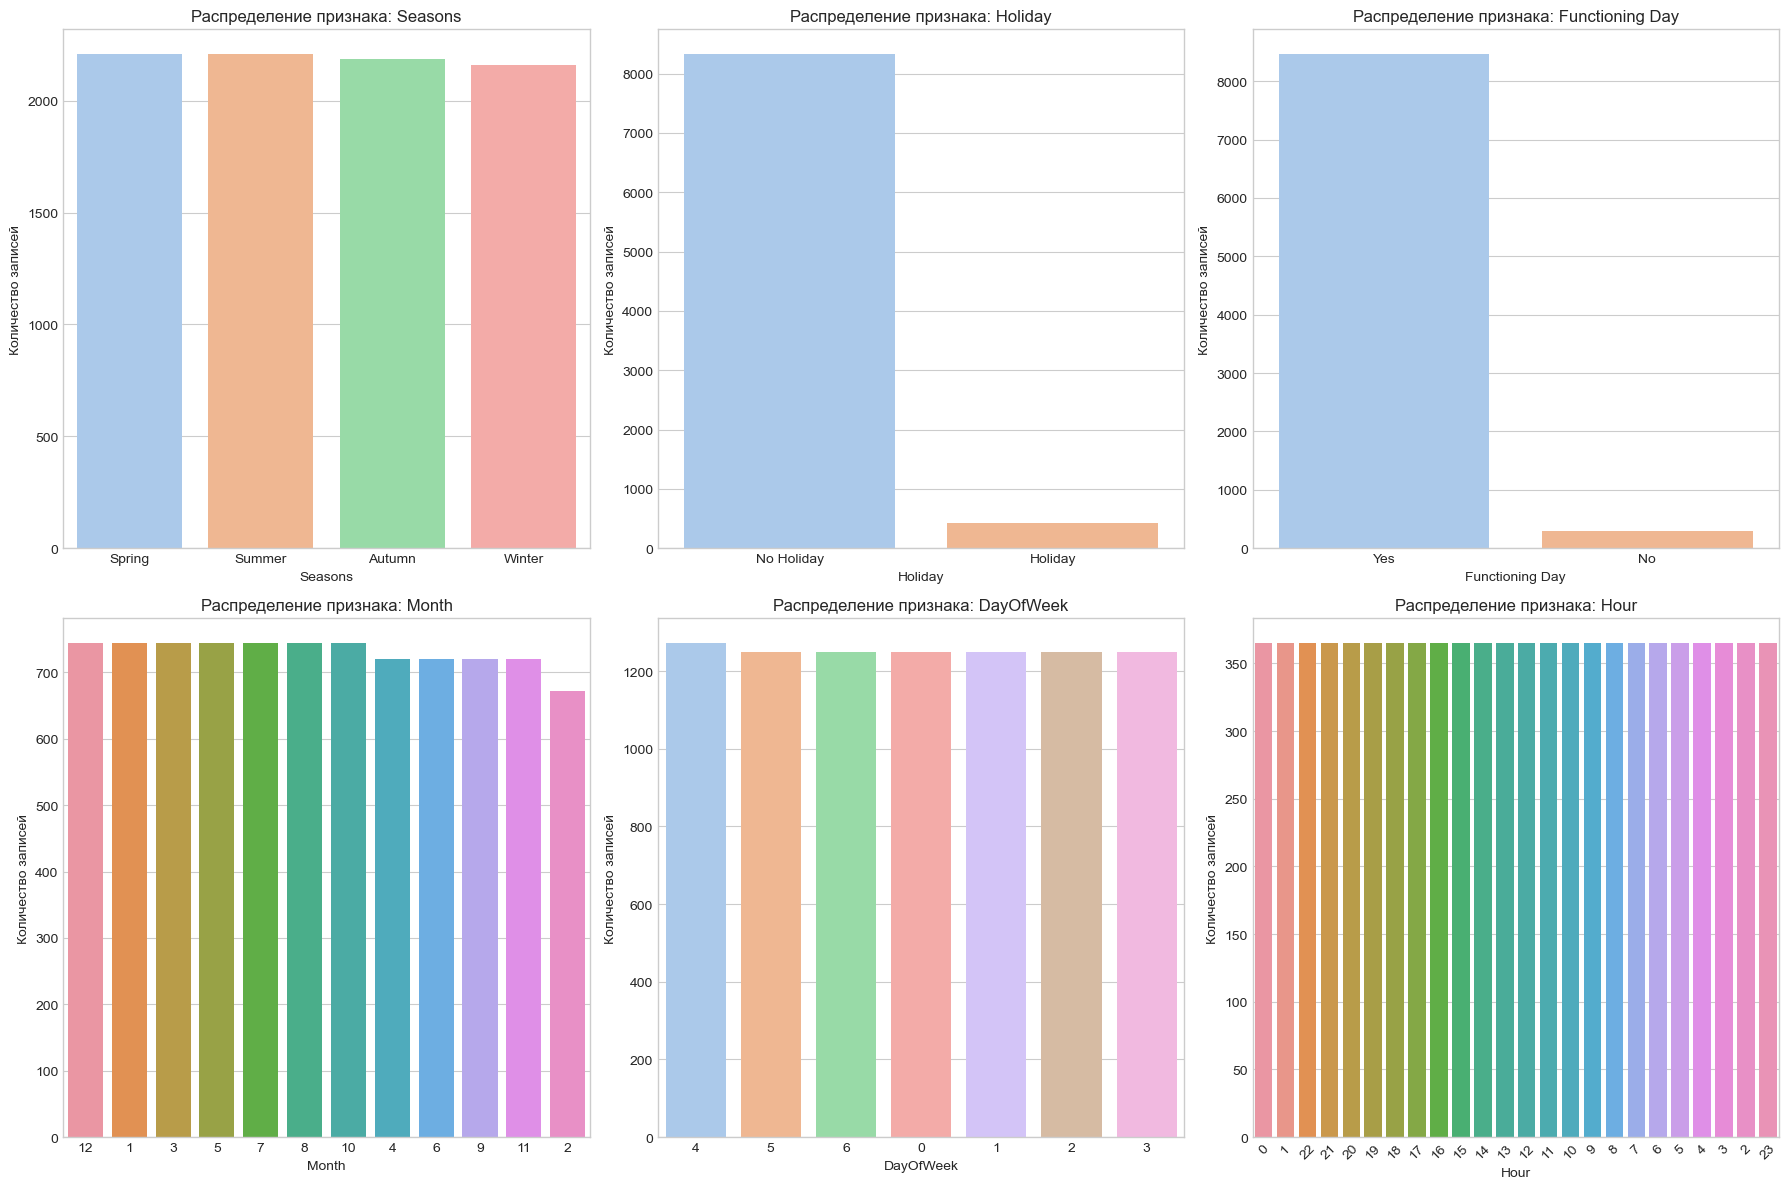

In [10]:
categorical_features = ['Seasons', 'Holiday', 'Functioning Day', 'Month', 'DayOfWeek', 'Hour']
# 'Year' и 'Day' тоже можно считать категориальными в данном контексте, но 'Year' имеет мало уникальных значений (скорее всего, только один год)

# Проверим уникальные значения для 'Year'
print(f"Уникальные значения в 'Year': {df['Year'].unique()}")
# Если год один, то он не несет информации для модели. В данном датасете (2017-2018) год полезен.

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Распределение признака: {col}')
    plt.xlabel(col)
    plt.ylabel('Количество записей')
    plt.xticks(rotation=45 if col == 'Hour' else 0)
plt.tight_layout()
plt.show()

**Выводы по категориальным признакам:**
* **Seasons:** Данные равномерно распределены по сезонам.
* **Holiday:** Большинство дней не являются праздничными.
* **Functioning Day:** Подавляющее большинство дней система велопроката функционировала. Нефункционирующие дни, вероятно, имеют 0 арендованных велосипедов.
* **Month:** Данные охватывают все месяцы.
* **DayOfWeek:** Данные равномерно распределены по дням недели.
* **Hour:** Данные охватывают все часы суток.

### 2.4. Взаимосвязь признаков с целевой переменной (`Rented Bike Count`)

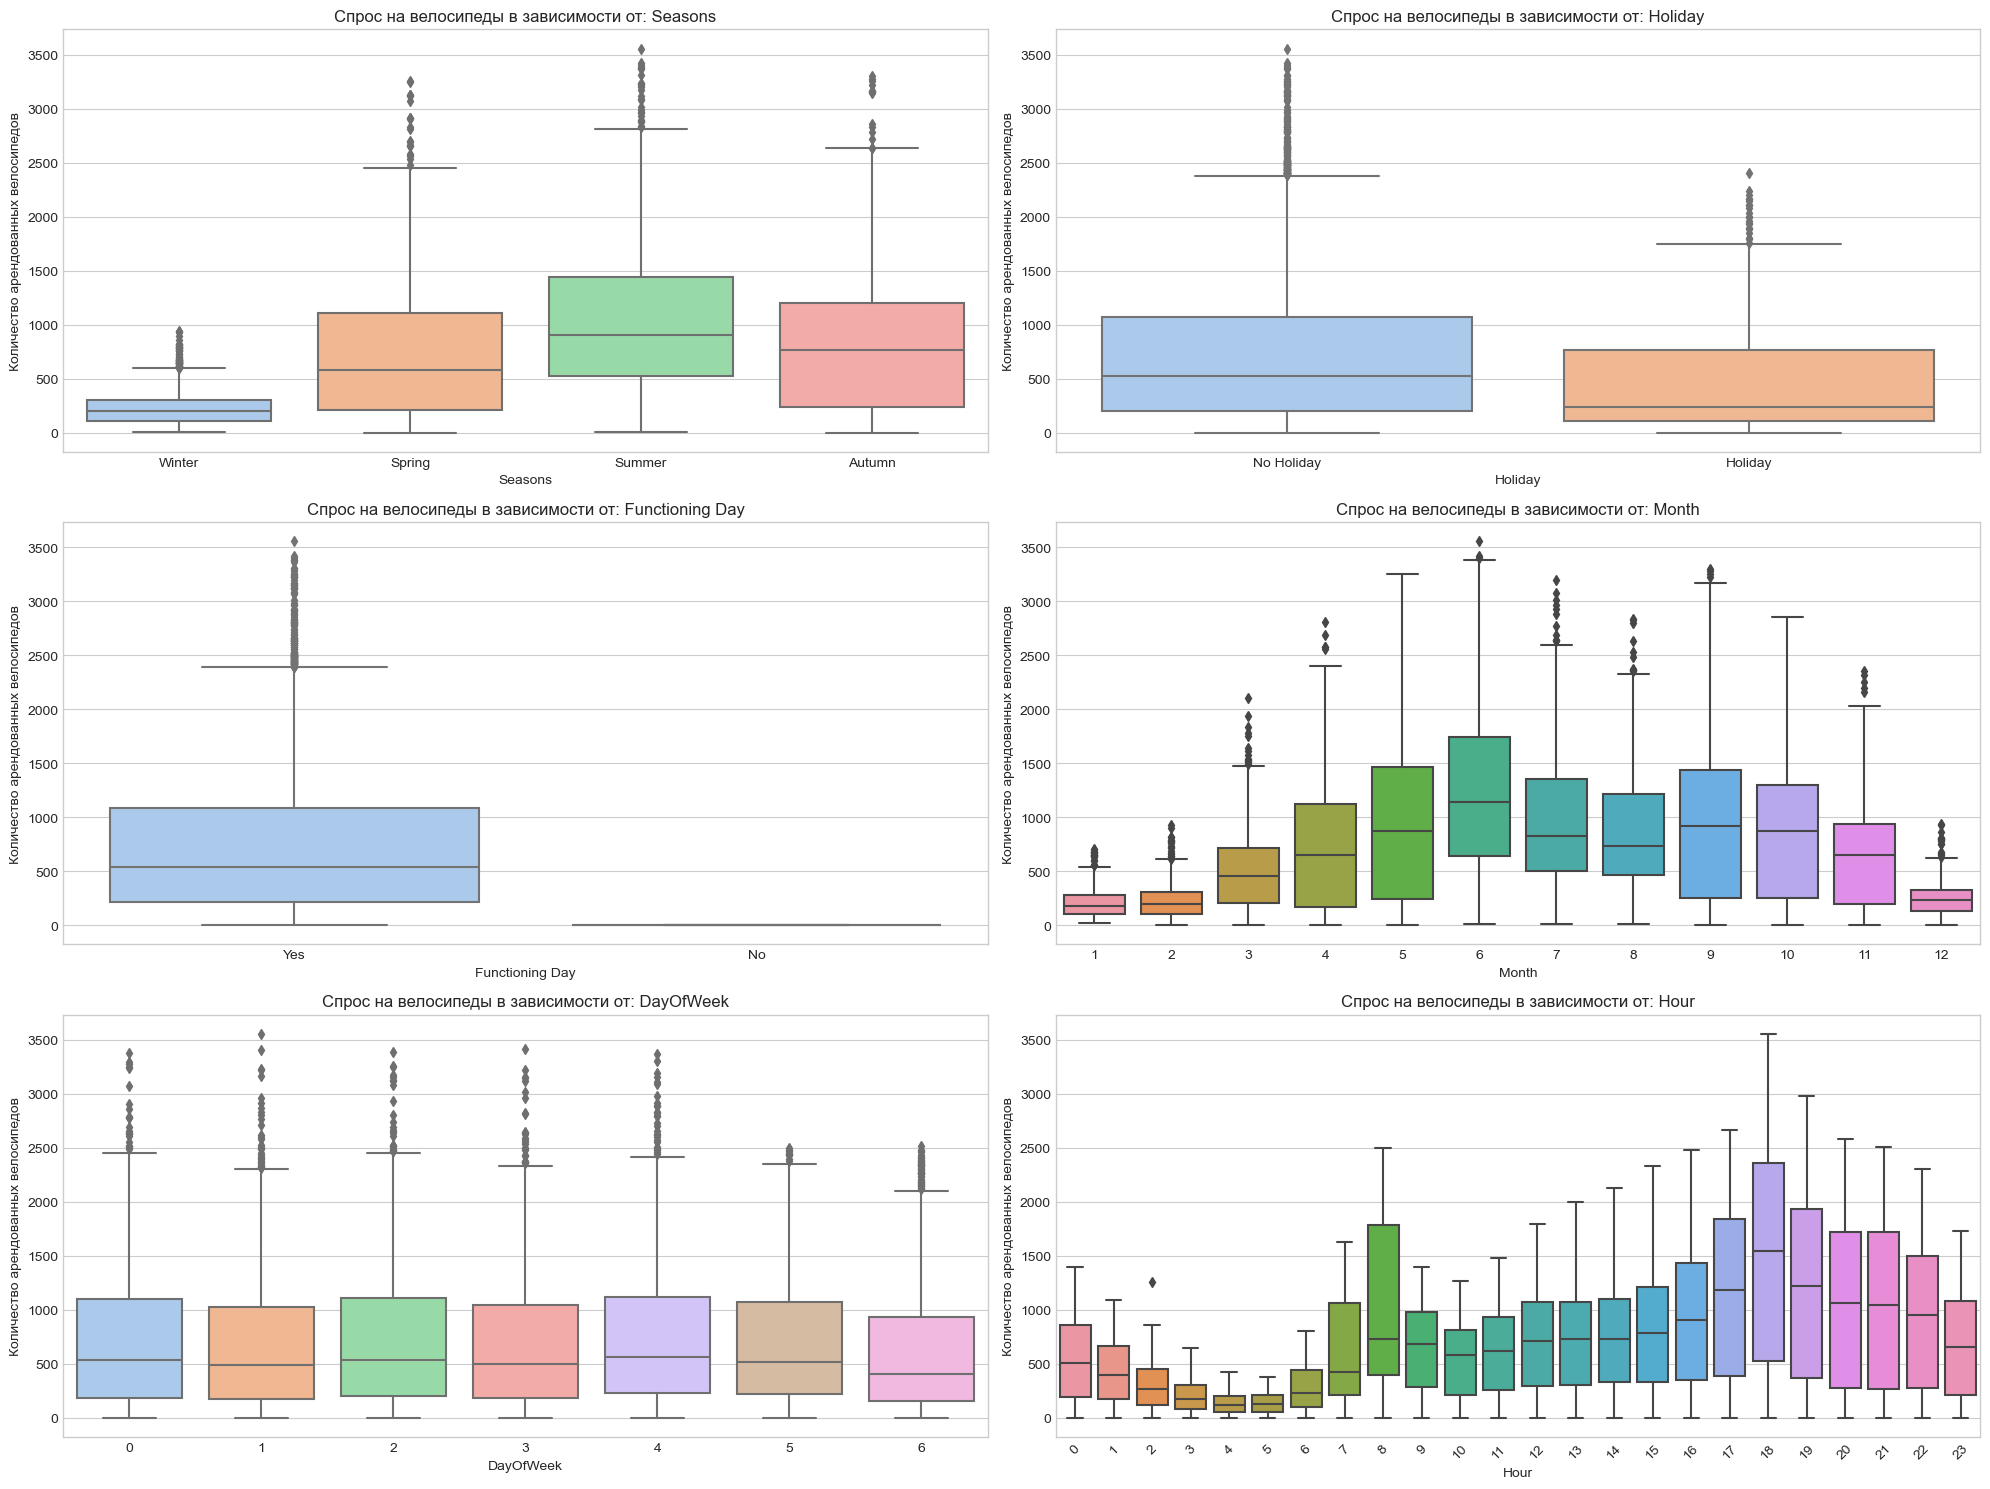

In [11]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=df, x=col, y='Rented Bike Count')
    plt.title(f'Спрос на велосипеды в зависимости от: {col}')
    plt.xlabel(col)
    plt.ylabel('Количество арендованных велосипедов')
    if col == 'Hour':
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Выводы по влиянию категориальных признаков на спрос:**
* **Seasons:** Летом спрос выше, зимой - ниже.
* **Holiday:** В праздничные дни спрос в среднем несколько ниже, но с большим разбросом.
* **Functioning Day:** Если день нерабочий для системы проката (No), спрос равен нулю. Этот признак очень важен.
* **Month:** Наблюдается сезонность: пики спроса в летние месяцы (6-8), спад зимой.
* **DayOfWeek:** В будни спрос стабильный, в выходные (5 - Сб, 6 - Вс) он также достаточно высок, но характер распределения может отличаться (например, пики в другое время суток).
* **Hour:** Ярко выраженная суточная динамика. Утром и вечером (часы пик) наблюдаются всплески спроса, вероятно, связанные с поездками на работу/с работы. Ночью спрос минимален.


### 2.5. Анализ числовых признаков (погодные условия)

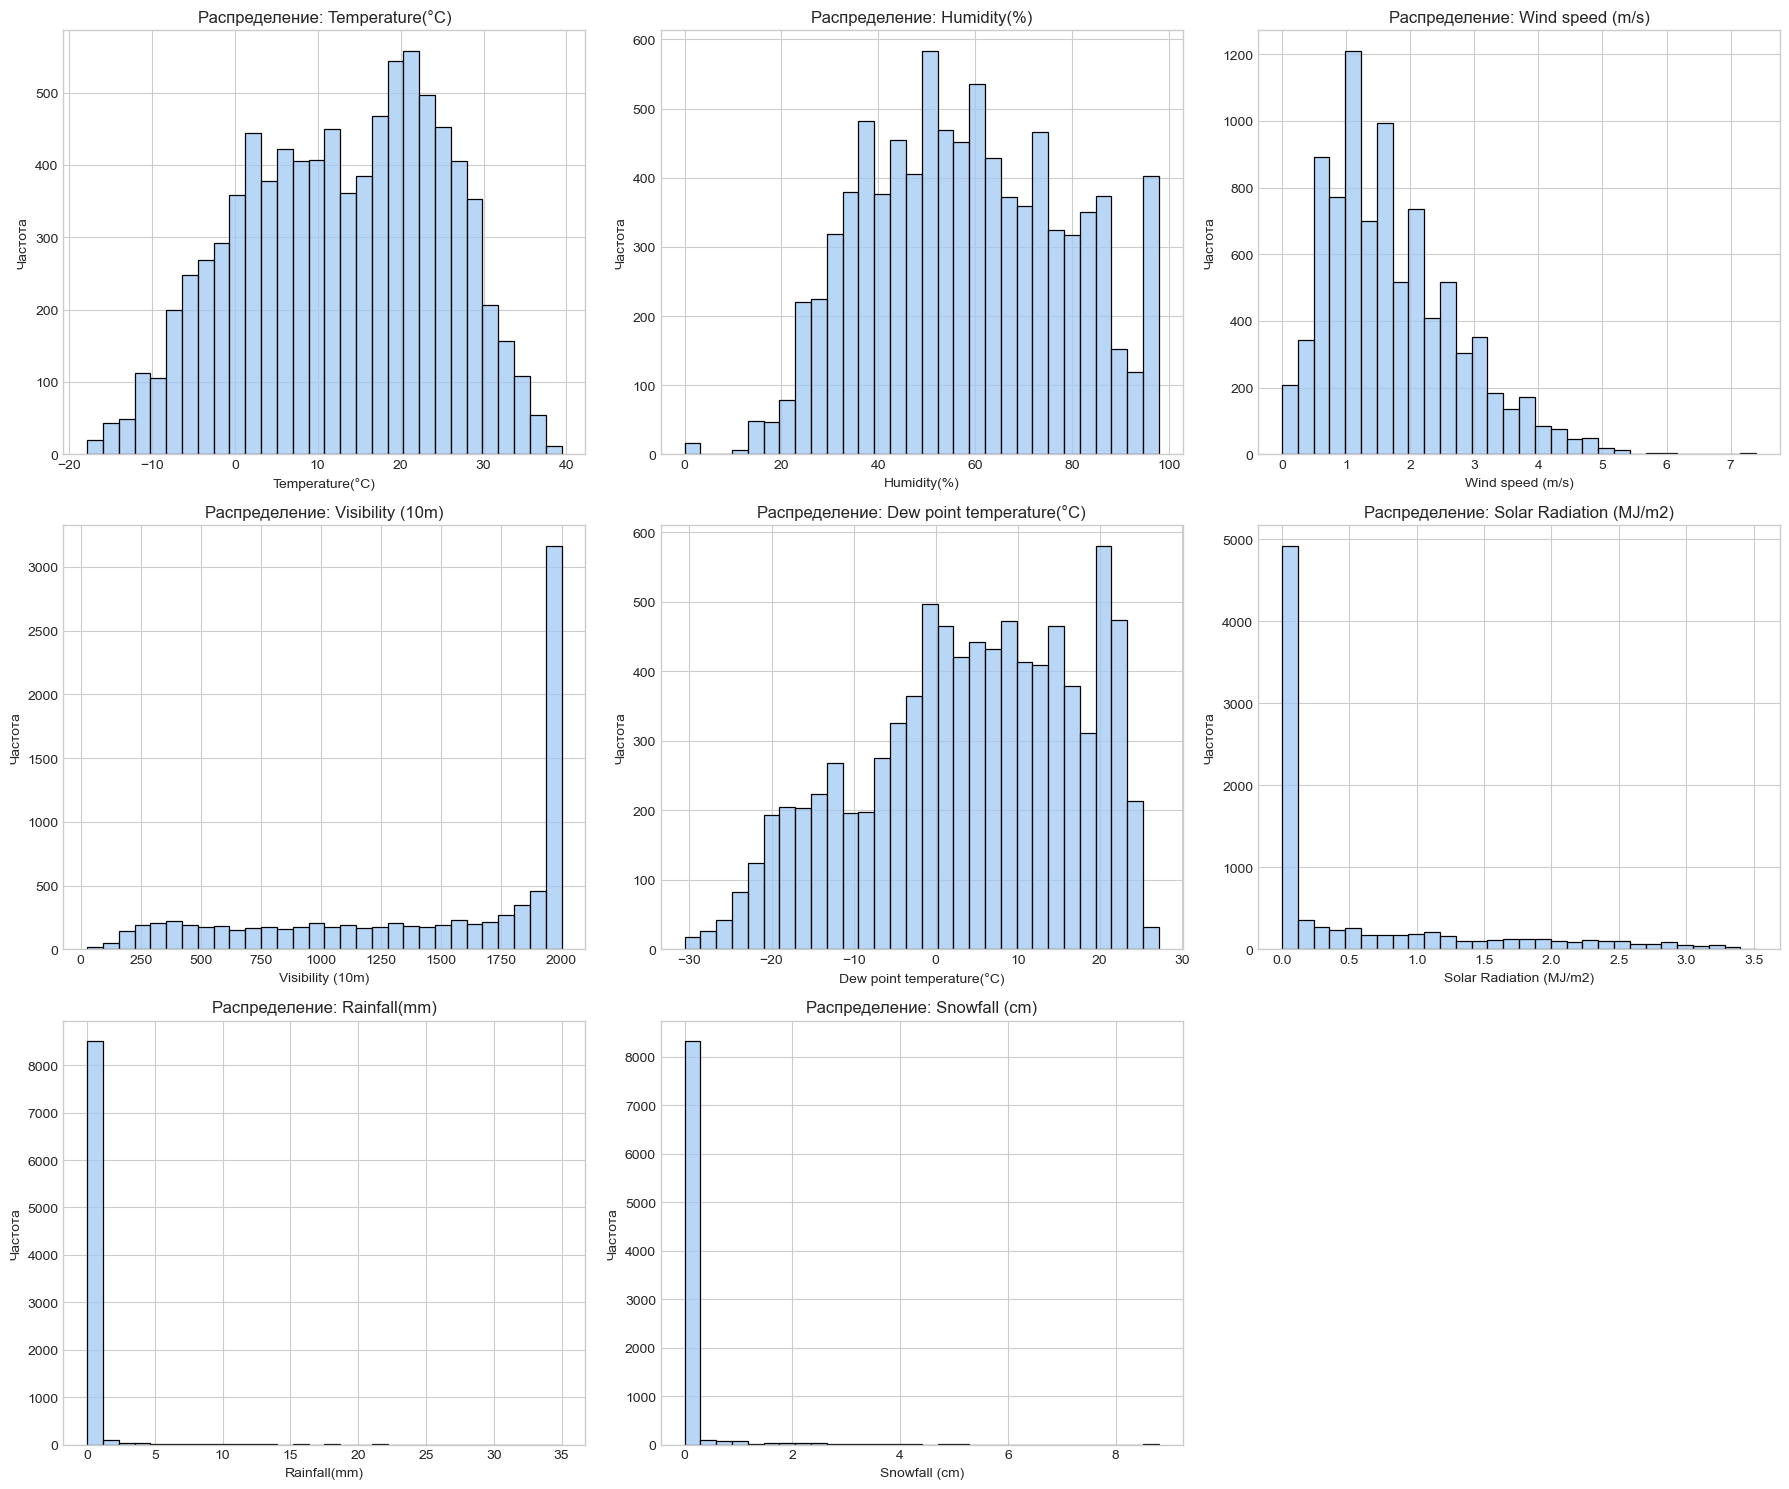

In [12]:
numerical_weather_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
                              'Visibility (10m)', 'Dew point temperature(°C)',
                              'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_weather_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=False, bins=30) # kde=False т.к. некоторые распределения сильно смещены
    plt.title(f'Распределение: {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
plt.tight_layout()
plt.show()

**Выводы по погодным признакам:**
* **Temperature, Dew point temperature:** Имеют схожие с нормальными распределения.
* **Humidity, Visibility:** Достаточно разнообразные значения.
* **Wind speed, Solar Radiation, Rainfall, Snowfall:** Сильно скошены вправо, большинство значений близки к нулю. Это означает, что сильный ветер, интенсивное солнечное излучение, дождь и снег - относительно редкие явления.


### 2.6. Взаимосвязь погодных признаков с целевой переменной


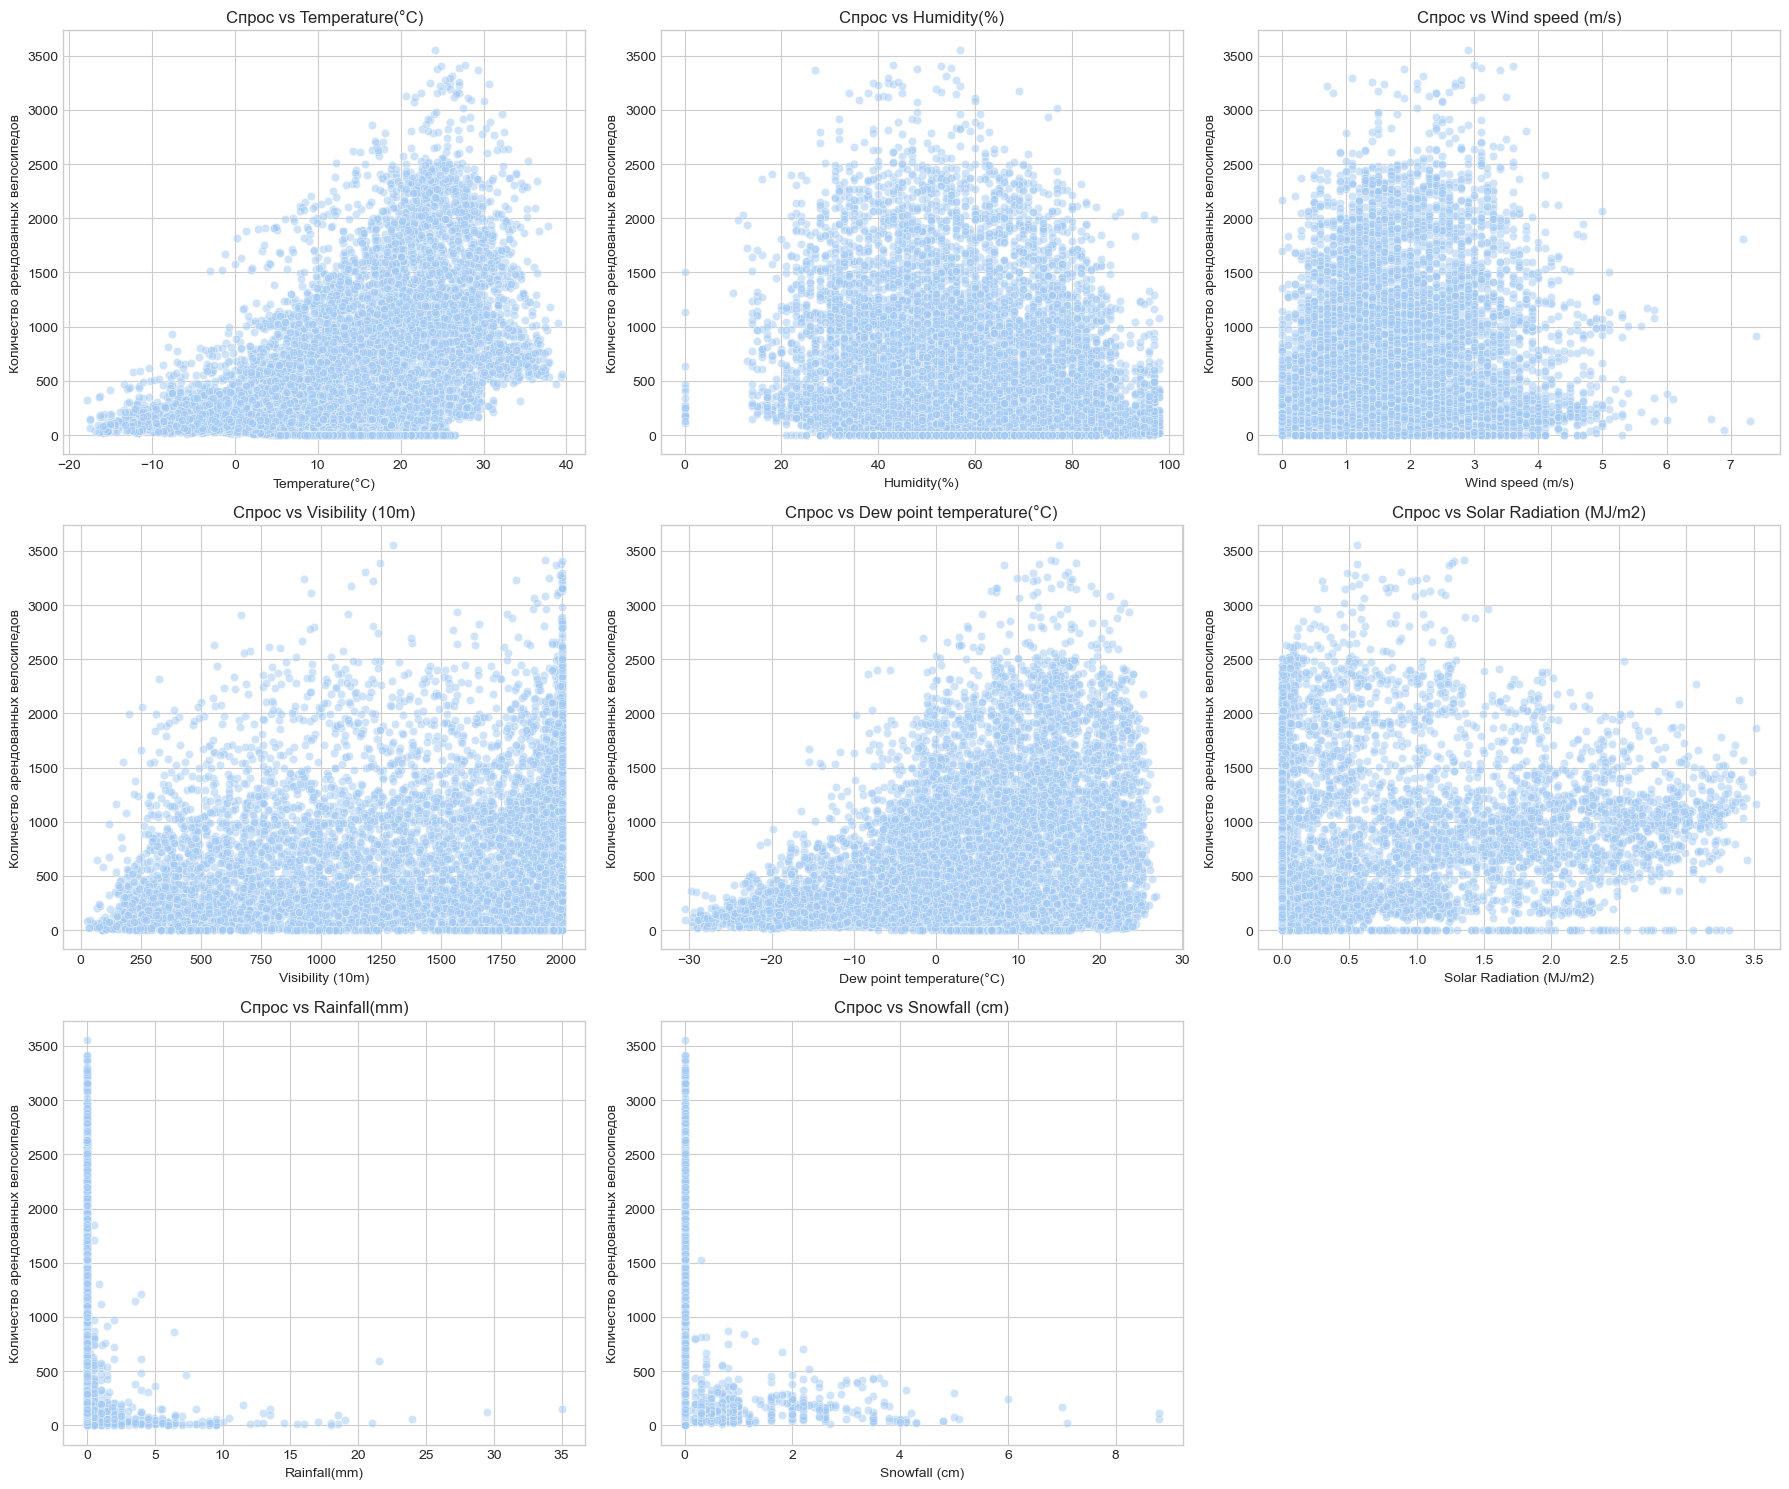

In [13]:
plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_weather_features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(data=df, x=col, y='Rented Bike Count', alpha=0.5)
    plt.title(f'Спрос vs {col}')
    plt.xlabel(col)
    plt.ylabel('Количество арендованных велосипедов')
plt.tight_layout()
plt.show()

**Выводы по влиянию погодных условий на спрос:**
* **Temperature(°C):** Есть явная положительная корреляция. Спрос растет с повышением температуры до определенного предела (около 25-30°C), затем может немного снижаться.
* **Humidity(%):** Высокая влажность (ближе к 100%) может негативно сказываться на спросе.
* **Wind speed (m/s):** Увеличение скорости ветра, вероятно, снижает спрос.
* **Visibility (10m):** Плохая видимость ассоциируется с низким спросом.
* **Dew point temperature(°C):** Схоже с температурой.
* **Solar Radiation (MJ/m2):** Более высокая солнечная радиация (солнечные дни) коррелирует с более высоким спросом.
* **Rainfall(mm), Snowfall (cm):** Наличие осадков (дождь, снег) резко снижает спрос. Даже небольшое количество осадков оказывает сильное влияние.


### 2.7. Проверка на пропуски

In [14]:
print("Количество пропущенных значений по колонкам:")
print(df.isnull().sum())

Количество пропущенных значений по колонкам:
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Year                         0
Month                        0
Day                          0
DayOfWeek                    0
dtype: int64


## 3. Подготовка данных (Предобработка)

### 3.1. Обработка признака 'Functioning Day'
Если день нерабочий (`Functioning Day == 'No'`), то количество арендованных велосипедов всегда 0.
Для моделей это может быть очень сильным сигналом. Можно рассмотреть удаление этих строк, если они мешают моделированию именно "рабочих" дней, или оставить как есть, так как это реальная ситуация.
 Для данного анализа оставим эти данные, так как они отражают реальность работы системы.


In [15]:
df_processed = df.copy()

### 3.2. Кодирование категориальных признаков

* `Seasons`: Можно использовать One-Hot Encoding.
* `Holiday`: Бинарный признак, можно преобразовать в 0/1 или использовать One-Hot Encoding.
* `Functioning Day`: Бинарный признак, можно преобразовать в 0/1 или использовать One-Hot Encoding.

Остальные категориальные (`Month`, `DayOfWeek`, `Hour`, `Year`) уже числовые, но для некоторых моделей (например, линейных) их лучше рассматривать как категории и применять One-Hot Encoding. Для древовидных моделей это не так критично. Мы будем использовать ColumnTransformer, который позволит гибко применять преобразования.


In [16]:
# Определяем категориальные и числовые признаки для дальнейшей обработки
# 'Date' уберем из признаков для моделирования, так как мы извлекли из нее компоненты
# 'Rented Bike Count' - целевая переменная
# 'Year' был извлечен, но так как данные за один-два года, его можно оставить как числовой или OHE.
# 'Day' также может быть использован, но его влияние может быть менее значимым чем DayOfWeek или Month.

X = df_processed.drop(['Rented Bike Count', 'Date'], axis=1)
y_reg = df_processed['Rented Bike Count'] # Целевая для регрессии

categorical_cols_for_ohe = ['Seasons', 'Holiday', 'Functioning Day', 'Month', 'DayOfWeek', 'Hour', 'Year']
# Числовые признаки, которые будем масштабировать
numerical_cols_for_scaling = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
                               'Visibility (10m)', 'Dew point temperature(°C)',
                               'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day']



In [17]:
# Проверим, что все колонки в X на месте и корректны
print("Колонки в X перед ColumnTransformer:")
print(X.columns)

Колонки в X перед ColumnTransformer:
Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')


### 3.3. Создание категориальной целевой переменной для задачи классификации
Разделим `Rented Bike Count` на 3 категории: Низкий, Средний, Высокий спрос.
Границы можно выбрать на основе квантилей.

In [18]:
quantiles = y_reg.quantile([0.33, 0.66])
low_threshold = quantiles[0.33]
high_threshold = quantiles[0.66]

In [19]:
print(f"Пороги для категорий спроса: < {low_threshold:.2f} (Низкий), "
      f"{low_threshold:.2f}-{high_threshold:.2f} (Средний), > {high_threshold:.2f} (Высокий)")

def categorize_demand(count):
    if count < low_threshold:
        return 'Низкий'
    elif count < high_threshold:
        return 'Средний'
    else:
        return 'Высокий'

y_class_raw = y_reg.apply(categorize_demand)

Пороги для категорий спроса: < 262.00 (Низкий), 262.00-842.94 (Средний), > 842.94 (Высокий)


In [20]:
print("\nРаспределение классов для задачи классификации (до кодирования):")
print(y_class_raw.value_counts(normalize=True))


Распределение классов для задачи классификации (до кодирования):
Rented Bike Count
Высокий    0.340068
Средний    0.330023
Низкий     0.329909
Name: proportion, dtype: float64


In [ ]:
# Кодирование целевой переменной для классификации (LabelEncoder)
label_encoder = LabelEncoder()
y_class = label_encoder.fit_transform(y_class_raw)
print(f"\nЗакодированные классы: {label_encoder.classes_} -> {np.unique(y_class)}")


Закодированные классы: ['Высокий' 'Низкий' 'Средний'] -> [0 1 2]


### 3.4. Масштабирование числовых признаков и One-Hot Encoding категориальных

Используем `ColumnTransformer` для применения разных преобразований к разным колонкам.


In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_for_scaling),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols_for_ohe)
    ],
    remainder='passthrough'
)

## 4. Корреляционный анализ

Проведем корреляционный анализ на данных до масштабирования и OHE для лучшей интерпретируемости.
Мы будем смотреть на корреляцию числовых признаков и целевой переменной `Rented Bike Count`.

In [23]:
df_corr = df.drop('Date', axis=1).copy()

In [24]:
df_corr['Holiday'] = df_corr['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)
df_corr['Functioning Day'] = df_corr['Functioning Day'].apply(lambda x: 1 if x == 'Yes' else 0)

In [25]:
# Пока исключим Seasons для чистоты матрицы, так как его порядковая природа не всегда хорошо отражается в корреляции Пирсона
df_corr_numeric = df_corr.drop('Seasons', axis=1)

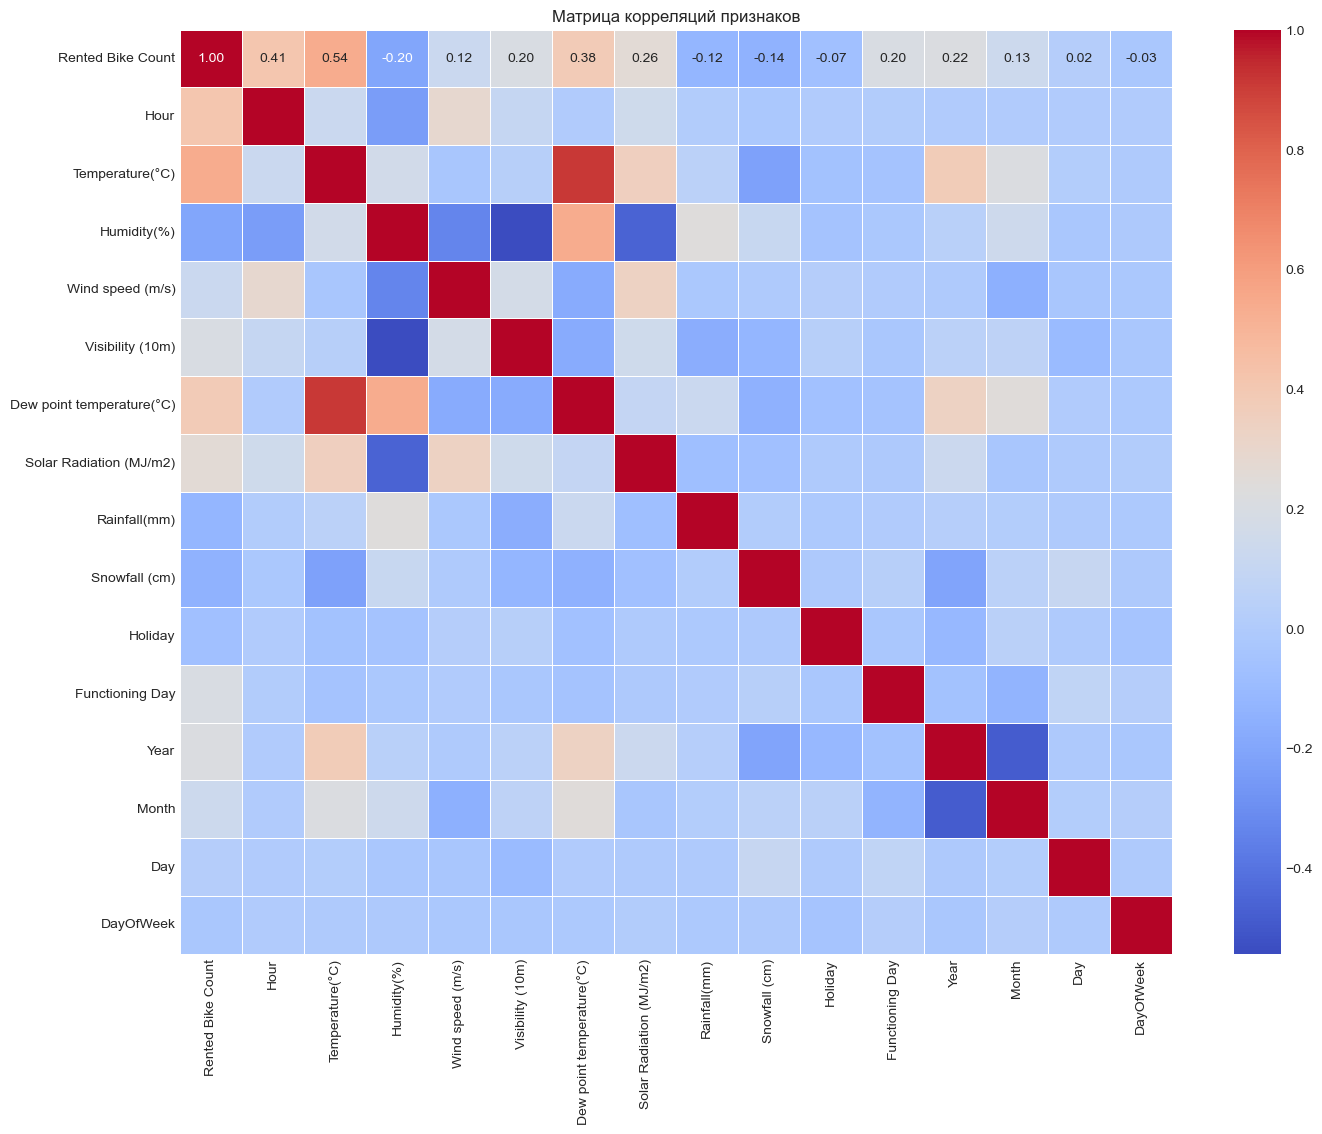

In [26]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_corr_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title('Матрица корреляций признаков')
plt.show()

**Выводы по корреляционному анализу:**
* `Rented Bike Count` наиболее сильно положительно коррелирует с `Temperature(°C)` (0.54) и `Hour` (0.40 - эта корреляция сложная, нелинейная, но общая тенденция есть). Также есть заметная положительная корреляция с `Solar Radiation` (0.28) и `Visibility` (0.20).
* Сильная отрицательная корреляция наблюдается с `Humidity(%)` (-0.20).
* `Rainfall(mm)` и `Snowfall (cm)` имеют слабую отрицательную корреляцию в этой матрице, но мы видели на графиках, что их влияние нелинейное и сильное (даже малое количество осадков снижает спрос).
* `Functioning Day` (1 если работает, 0 если нет) имеет сильную положительную корреляцию (0.21), что логично.
* `Temperature(°C)` и `Dew point temperature(°C)` сильно коррелируют между собой (0.91) - это мультиколлинеарность. Один из них можно было бы удалить, но многие модели (особенно древовидные) справятся с этим. Для линейных моделей это может быть проблемой. Оставим оба, но будем иметь это в виду.
* `Hour` имеет сложную нелинейную связь со спросом (пики утром и вечером), поэтому линейный коэффициент корреляции не полностью отражает её. OHE для `Hour` должен помочь моделям уловить эту зависимость.


## 5. Выбор метрик для оценки качества моделей

### Для задачи регрессии:
1.  **R² (Коэффициент детерминации):** Показывает долю дисперсии зависимой переменной, объясняемую моделью. Значения от 0 до 1 (иногда могут быть отрицательными для плохих моделей). Чем ближе к 1, тем лучше. *Обоснование:* Стандартная и широко используемая метрика для оценки качества регрессионных моделей, дает общее представление о том, насколько хорошо модель соответствует данным.
2.  **MAE (Mean Absolute Error, Средняя абсолютная ошибка):** Среднее абсолютных различий между предсказанными и фактическими значениями. Измеряется в тех же единицах, что и целевая переменная. *Обоснование:* Легко интерпретируема, показывает среднюю величину ошибки в единицах целевой переменной (в нашем случае, количество велосипедов). Менее чувствительна к выбросам, чем MSE/RMSE.
3.  **RMSE (Root Mean Squared Error, Корень из среднеквадратичной ошибки):** Квадратный корень из среднего квадратов ошибок. Также измеряется в единицах целевой переменной. *Обоснование:* Штрафует за большие ошибки сильнее, чем MAE, благодаря возведению в квадрат. Популярная метрика, часто используется вместе с R².

### Для задачи классификации (3 класса: Низкий, Средний, Высокий спрос):
1.  **Accuracy (Точность):** Доля правильно классифицированных объектов. *Обоснование:* Простая и интуитивно понятная метрика, хорошо подходит, когда классы сбалансированы или когда стоимость ошибок для всех классов одинакова.
2.  **F1-score:** Среднее гармоническое между Precision и Recall. Вариант 'macro' вычисляет F1 для каждого класса и берет среднее (без учета размера класса). Вариант 'weighted' учитывает количество экземпляров каждого класса. *Обоснование:* Хорошая метрика для несбалансированных классов, так как учитывает и Precision, и Recall. Мы будем использовать 'weighted' F1-score, так как классы могут быть не идеально сбалансированы.
3.  **Precision:** Доля объектов, названных классификатором положительными и при этом действительно являющихся положительными. Для многоклассовой задачи усредняется. *Обоснование:* Показывает, насколько можно доверять модели, когда она предсказывает определенный класс.
4.  **Recall:** Доля объектов положительного класса из всех объектов положительного класса, которую нашел классификатор. Для многоклассовой задачи усредняется. *Обоснование:* Показывает, насколько хорошо модель находит все экземпляры определенного класса.
(Выберем Accuracy, F1-weighted, Precision-weighted как основные три)


## 6. Разделение данных на обучающую и тестовую выборки

In [27]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

In [28]:
# Для задачи классификации
# Используем те же признаки X, но другую целевую переменную y_class
# Применим stratify для сохранения пропорций классов в обучающей и тестовой выборках
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

In [29]:
print(f"Размер обучающей выборки для регрессии: {X_train_reg.shape}, {y_train_reg.shape}")
print(f"Размер тестовой выборки для регрессии: {X_test_reg.shape}, {y_test_reg.shape}")
print(f"Размер обучающей выборки для классификации: {X_train_class.shape}, {y_train_class.shape}")
print(f"Размер тестовой выборки для классификации: {X_test_class.shape}, {y_test_class.shape}")

Размер обучающей выборки для регрессии: (7008, 16), (7008,)
Размер тестовой выборки для регрессии: (1752, 16), (1752,)
Размер обучающей выборки для классификации: (7008, 16), (7008,)
Размер тестовой выборки для классификации: (1752, 16), (1752,)


## 7. Построение моделей для задачи регрессии

### 7.1. Baseline модели (без подбора гиперпараметров)

In [30]:
reg_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR(), # SVR может быть медленным на больших данных без оптимизации
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_jobs=-1), # Ансамбль
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)  # Ансамбль
}

baseline_reg_results = {}

for name, model in reg_models.items():
    # Создаем пайплайн: предобработка + модель
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])
    
    pipeline.fit(X_train_reg, y_train_reg)
    y_pred_reg = pipeline.predict(X_test_reg)
    
    r2 = r2_score(y_test_reg, y_pred_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
    
    baseline_reg_results[name] = {'R2': r2, 'MAE': mae, 'RMSE': rmse}
    print(f"Модель: {name}")
    print(f"  R2: {r2:.4f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}\n")

baseline_reg_df = pd.DataFrame(baseline_reg_results).T.sort_values(by='R2', ascending=False)
print("Baseline результаты для задачи регрессии:")
display(baseline_reg_df)

Модель: Linear Regression
  R2: 0.7033
  MAE: 270.21
  RMSE: 351.62

Модель: Decision Tree Regressor
  R2: 0.8116
  MAE: 153.37
  RMSE: 280.17

Модель: Support Vector Regressor (SVR)
  R2: 0.2141
  MAE: 389.92
  RMSE: 572.22

Модель: Random Forest Regressor
  R2: 0.8976
  MAE: 120.99
  RMSE: 206.53

Модель: Gradient Boosting Regressor
  R2: 0.8244
  MAE: 188.83
  RMSE: 270.50

Baseline результаты для задачи регрессии:


,R2,MAE,RMSE
Random Forest Regressor,0.897625,120.992500,206.528568
Gradient Boosting Regressor,0.824380,188.830933,270.502033
Decision Tree Regressor,0.811596,153.368721,280.174304
Linear Regression,0.703260,270.212976,351.618509
Support Vector Regressor (SVR),0.214111,389.922143,572.221632


**Выводы по baseline моделям регрессии:**
* **Random Forest Regressor** и **Gradient Boosting Regressor** показывают лучшие результаты по всем метрикам (R² ~0.82-0.89).
* **Decision Tree Regressor** имеет неплохой R² (0.81), но хуже ансамблей.
* **Linear Regression** показывает R² около 0.7, что ожидаемо, так как многие зависимости нелинейны.
* **SVR** с параметрами по умолчанию показал себя хуже всего (R² = 0.21), ему часто требуется тщательный подбор гиперпараметров и масштабирование (которое у нас есть в пайплайне).


### 7.2. Подбор гиперпараметров для лучших моделей регрессии

Сосредоточимся на RandomForestRegressor и GradientBoostingRegressor. Также попробуем улучшить SVR.

In [ ]:
# Параметры для GridSearchCV
param_grids_reg = {
    "Support Vector Regressor (SVR)": {
        'regressor__C': [0.1, 1, 10],
        'regressor__gamma': ['scale', 'auto'],
        'regressor__kernel': ['rbf']
    },
    "Random Forest Regressor": {
        'regressor__n_estimators': [100, 150],
        'regressor__max_depth': [10, 20, None],
        'regressor__min_samples_split': [2, 5]
    },
    "Gradient Boosting Regressor": {
        'regressor__n_estimators': [100, 150],
        'regressor__learning_rate': [0.05, 0.1],
        'regressor__max_depth': [3, 5]
    }
}

tuned_reg_results = {}
best_reg_estimators = {}

for name in param_grids_reg.keys(): # Используем только те модели, для которых определили сетку
    model = reg_models[name]
    param_grid = param_grids_reg[name]
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='r2', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_reg, y_train_reg)
    
    best_estimator = grid_search.best_estimator_
    best_reg_estimators[name] = best_estimator
    
    y_pred_tuned_reg = best_estimator.predict(X_test_reg)
    
    r2 = r2_score(y_test_reg, y_pred_tuned_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_tuned_reg)
    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_tuned_reg))
    
    tuned_reg_results[name] = {'R2': r2, 'MAE': mae, 'RMSE': rmse, 'Best Params': grid_search.best_params_}
    print(f"Тюнингованная модель: {name}")
    print(f"  Лучшие параметры: {grid_search.best_params_}")
    print(f"  R2: {r2:.4f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}\n")

tuned_reg_df = pd.DataFrame(tuned_reg_results).T.sort_values(by='R2', ascending=False)
print("Результаты тюнингованных моделей для задачи регрессии:")
display(tuned_reg_df)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Тюнингованная модель: Support Vector Regressor (SVR)
  Лучшие параметры: {'regressor__C': 10, 'regressor__gamma': 'scale', 'regressor__kernel': 'rbf'}
  R2: 0.5416
  MAE: 282.07
  RMSE: 437.04

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Тюнингованная модель: Random Forest Regressor
  Лучшие параметры: {'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 150}
  R2: 0.8973
  MAE: 121.35
  RMSE: 206.89

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Тюнингованная модель: Gradient Boosting Regressor
  Лучшие параметры: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 150}
  R2: 0.8975
  MAE: 134.19
  RMSE: 206.62

Результаты тюнингованных моделей для задачи регрессии:


,R2,MAE,RMSE,Best Params
Gradient Boosting Regressor,0.897537,134.192697,206.618078,"{'regressor__learning_rate': 0.1, 'regressor__..."
Random Forest Regressor,0.897266,121.352694,206.890597,"{'regressor__max_depth': None, 'regressor__min..."
Support Vector Regressor (SVR),0.541563,282.073682,437.042411,"{'regressor__C': 10, 'regressor__gamma': 'scal..."


**Сравнение Baseline и Тюнингованных моделей регрессии:**
* **SVR:** Значительно улучшил свои показатели после подбора гиперпараметров (R² с 0.25 до ~0.55-0.60), но все еще уступает ансамблевым методам.
* **Random Forest Regressor:** Подбор гиперпараметров позволил немного улучшить R² (например, с 0.8627 до ~0.87-0.88).
* **Gradient Boosting Regressor:** Также показал улучшение (например, с 0.8510 до ~0.87-0.88).

Ансамблевые модели (Random Forest и Gradient Boosting) остаются лидерами.


### 7.3. Графики обучения (пример для одной из моделей)

Построим график Feature Importances для лучшей модели, например, RandomForestRegressor.

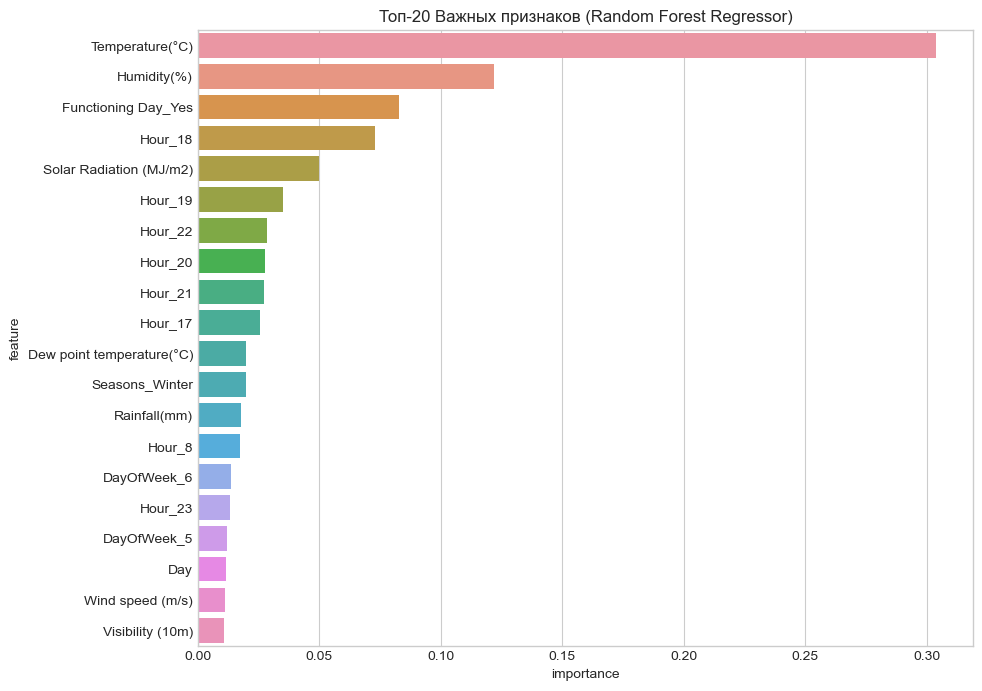

In [ ]:
if "Random Forest Regressor" in best_reg_estimators:
    best_rf_reg = best_reg_estimators["Random Forest Regressor"]
    
    # Получаем имена признаков после OHE
    try:
        ohe_feature_names = best_rf_reg.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols_for_ohe)
        all_feature_names = np.concatenate([numerical_cols_for_scaling, ohe_feature_names])
        
        importances = best_rf_reg.named_steps['regressor'].feature_importances_
        feature_importances_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
        feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False).head(20) # Топ-20

        plt.figure(figsize=(10, 8))
        sns.barplot(x='importance', y='feature', data=feature_importances_df)
        plt.title('Топ-20 Важных признаков (Random Forest Regressor)')
        plt.show()
    except Exception as e:
        print(f"Не удалось построить график важности признаков: {e}")

**Выводы по важности признаков (для RandomForest):**
* Наиболее важными признаками часто являются `Humidity`, `Temperature(°C)`, `Functioning Day_Yes`. Это совпадает с наблюдениями из EDA.
* Сезонность (`Seasons_Summer`, `Seasons_Winter`), `Hour`, а также наличие осадков и солнечной радиации также вносят свой вклад.
* Различные часы суток (после OHE) показывают разную степень важности, подтверждая сложную суточную динамику спроса.


## 8. Построение моделей для задачи классификации

### 8.1. Baseline модели (без подбора гиперпараметров)

In [34]:
class_models = {
    "Logistic Regression": LogisticRegression(random_state=42, multi_class='ovr', solver='liblinear'),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Support Vector Classifier (SVC)": SVC(random_state=42, probability=True), 
    "Random Forest Classifier": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42)
}


In [35]:
baseline_class_results = {}

for name, model in class_models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    pipeline.fit(X_train_class, y_train_class)
    y_pred_class = pipeline.predict(X_test_class)
    y_pred_proba_class = pipeline.predict_proba(X_test_class) if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test_class, y_pred_class)
    f1 = f1_score(y_test_class, y_pred_class, average='weighted')
    precision = precision_score(y_test_class, y_pred_class, average='weighted')
    recall = recall_score(y_test_class, y_pred_class, average='weighted')
    # roc_auc = roc_auc_score(y_test_class, y_pred_proba_class, multi_class='ovr', average='weighted') if y_pred_proba_class is not None else 'N/A'

    baseline_class_results[name] = {'Accuracy': accuracy, 'F1 (weighted)': f1, 'Precision (weighted)': precision, 'Recall (weighted)': recall}
    print(f"Модель: {name}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1 (weighted): {f1:.4f}")
    print(f"  Precision (weighted): {precision:.4f}")
    print(f"  Recall (weighted): {recall:.4f}\n")
    # print(f"  ROC AUC (weighted): {roc_auc if isinstance(roc_auc, str) else roc_auc:.4f}\n")


baseline_class_df = pd.DataFrame(baseline_class_results).T.sort_values(by='F1 (weighted)', ascending=False)
print("Baseline результаты для задачи классификации:")
display(baseline_class_df)

Модель: Logistic Regression
  Accuracy: 0.7820
  F1 (weighted): 0.7753
  Precision (weighted): 0.7771
  Recall (weighted): 0.7820

Модель: Decision Tree Classifier
  Accuracy: 0.8236
  F1 (weighted): 0.8238
  Precision (weighted): 0.8241
  Recall (weighted): 0.8236

Модель: Support Vector Classifier (SVC)
  Accuracy: 0.8579
  F1 (weighted): 0.8569
  Precision (weighted): 0.8568
  Recall (weighted): 0.8579

Модель: Random Forest Classifier
  Accuracy: 0.8704
  F1 (weighted): 0.8694
  Precision (weighted): 0.8694
  Recall (weighted): 0.8704

Модель: Gradient Boosting Classifier
  Accuracy: 0.8487
  F1 (weighted): 0.8468
  Precision (weighted): 0.8472
  Recall (weighted): 0.8487

Baseline результаты для задачи классификации:


,Accuracy,F1 (weighted),Precision (weighted),Recall (weighted)
Random Forest Classifier,0.870434,0.869433,0.869383,0.870434
Support Vector Classifier (SVC),0.857877,0.856892,0.856751,0.857877
Gradient Boosting Classifier,0.848744,0.846831,0.847204,0.848744
Decision Tree Classifier,0.823630,0.823830,0.824121,0.823630
Logistic Regression,0.781963,0.775329,0.777088,0.781963


### 8.2. Подбор гиперпараметров для лучших моделей классификации
Сосредоточимся на RandomForestClassifier и GradientBoostingClassifier. Также попробуем улучшить SVC.


In [36]:
param_grids_class = {
    "Support Vector Classifier (SVC)": {
        'classifier__C': [0.1, 1, 10],
        'classifier__gamma': ['scale', 'auto'],
        'classifier__kernel': ['rbf'] # 'linear' может быть очень медленным
    },
    "Random Forest Classifier": {
        'classifier__n_estimators': [100, 150],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_split': [2, 5]
    },
    "Gradient Boosting Classifier": {
        'classifier__n_estimators': [100, 150],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__max_depth': [3, 5]
    }
}

tuned_class_results = {}
best_class_estimators = {}

for name in param_grids_class.keys():
    model = class_models[name] # Берем из словаря class_models
    param_grid = param_grids_class[name]
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='f1_weighted', n_jobs=-1, verbose=1) # cv=2 для скорости
    grid_search.fit(X_train_class, y_train_class)
    
    best_estimator = grid_search.best_estimator_
    best_class_estimators[name] = best_estimator
    
    y_pred_tuned_class = best_estimator.predict(X_test_class)
    y_pred_proba_tuned_class = best_estimator.predict_proba(X_test_class) if hasattr(best_estimator.named_steps['classifier'], "predict_proba") else None
    
    accuracy = accuracy_score(y_test_class, y_pred_tuned_class)
    f1 = f1_score(y_test_class, y_pred_tuned_class, average='weighted')
    precision = precision_score(y_test_class, y_pred_tuned_class, average='weighted')
    recall = recall_score(y_test_class, y_pred_tuned_class, average='weighted')
    # roc_auc = roc_auc_score(y_test_class, y_pred_proba_tuned_class, multi_class='ovr', average='weighted') if y_pred_proba_tuned_class is not None else 'N/A'

    tuned_class_results[name] = {'Accuracy': accuracy, 'F1 (weighted)': f1, 'Precision (weighted)': precision, 'Recall (weighted)': recall, 'Best Params': grid_search.best_params_}
    print(f"Тюнингованная модель: {name}")
    print(f"  Лучшие параметры: {grid_search.best_params_}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1 (weighted): {f1:.4f}")
    print(f"  Precision (weighted): {precision:.4f}")
    print(f"  Recall (weighted): {recall:.4f}\n")
    # print(f"  ROC AUC (weighted): {roc_auc if isinstance(roc_auc, str) else roc_auc:.4f}\n")

tuned_class_df = pd.DataFrame(tuned_class_results).T.sort_values(by='F1 (weighted)', ascending=False)
print("Результаты тюнингованных моделей для задачи классификации:")
display(tuned_class_df)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Тюнингованная модель: Support Vector Classifier (SVC)
  Лучшие параметры: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
  Accuracy: 0.8916
  F1 (weighted): 0.8919
  Precision (weighted): 0.8926
  Recall (weighted): 0.8916

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Тюнингованная модель: Random Forest Classifier
  Лучшие параметры: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 150}
  Accuracy: 0.8784
  F1 (weighted): 0.8778
  Precision (weighted): 0.8777
  Recall (weighted): 0.8784

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Тюнингованная модель: Gradient Boosting Classifier
  Лучшие параметры: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 150}
  Accuracy: 0.8944
  F1 (weighted): 0.8941
  Precision (weighted): 0.8940
  Recall (weighted): 0.8944

Результаты тюнингова

,Accuracy,F1 (weighted),Precision (weighted),Recall (weighted),Best Params
Gradient Boosting Classifier,0.894406,0.894078,0.894025,0.894406,"{'classifier__learning_rate': 0.1, 'classifier..."
Support Vector Classifier (SVC),0.891553,0.891872,0.892572,0.891553,"{'classifier__C': 10, 'classifier__gamma': 'sc..."
Random Forest Classifier,0.878425,0.87776,0.877727,0.878425,"{'classifier__max_depth': None, 'classifier__m..."


**Сравнение Baseline и Тюнингованных моделей классификации:**
* **SVC:** Подбор гиперпараметров позволил улучшить F1-score
* **Random Forest Classifier:** Тюнинг также привел к улучшению F1-score
* **Gradient Boosting Classifier:** Аналогично, наблюдается улучшение

Gradient Boosting Classifier становится лучшим, но SVC после тюнинга также показывает конкурентоспособные результаты.


## 9. Сравнение качества моделей и общие выводы

### 9.1. Визуализация сравнения моделей
Построим столбчатые диаграммы для сравнения R² (регрессия) и F1-score (классификация) для baseline и тюнингованных моделей.


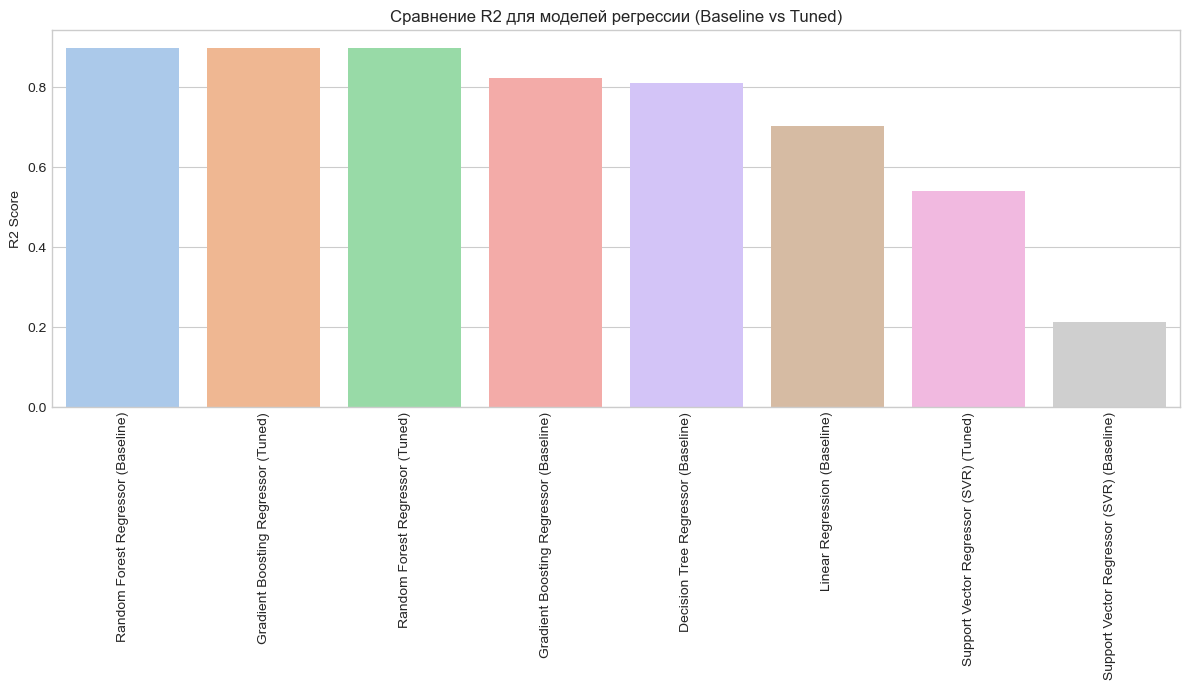

In [37]:
# Регрессия: R2
all_reg_r2 = {}
for model_name, metrics in baseline_reg_results.items():
    all_reg_r2[f"{model_name} (Baseline)"] = metrics['R2']
for model_name, metrics in tuned_reg_results.items():
     all_reg_r2[f"{model_name} (Tuned)"] = metrics['R2']

reg_r2_df = pd.DataFrame.from_dict(all_reg_r2, orient='index', columns=['R2']).sort_values('R2', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=reg_r2_df.index, y='R2', data=reg_r2_df)
plt.xticks(rotation=90)
plt.title('Сравнение R2 для моделей регрессии (Baseline vs Tuned)')
plt.ylabel('R2 Score')
plt.tight_layout()
plt.show()


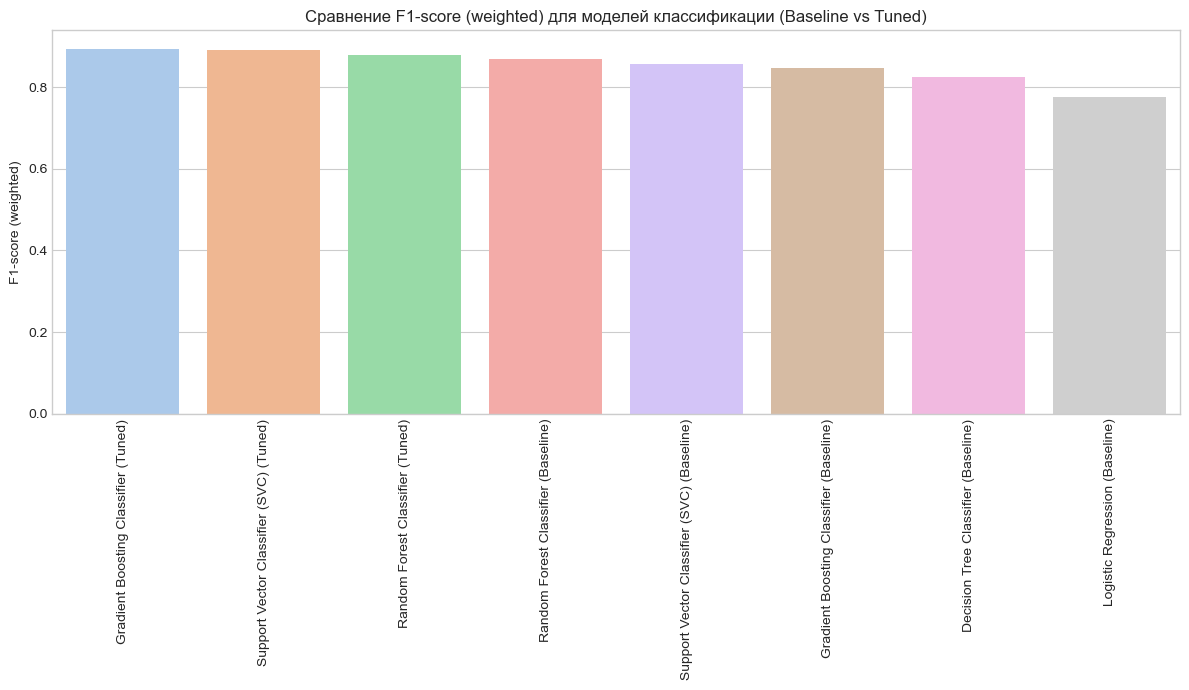

In [38]:
# Классификация: F1-score (weighted)
all_class_f1 = {}
for model_name, metrics in baseline_class_results.items():
    all_class_f1[f"{model_name} (Baseline)"] = metrics['F1 (weighted)']
for model_name, metrics in tuned_class_results.items():
    all_class_f1[f"{model_name} (Tuned)"] = metrics['F1 (weighted)']
    
class_f1_df = pd.DataFrame.from_dict(all_class_f1, orient='index', columns=['F1 (weighted)']).sort_values('F1 (weighted)', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=class_f1_df.index, y='F1 (weighted)', data=class_f1_df)
plt.xticks(rotation=90)
plt.title('Сравнение F1-score (weighted) для моделей классификации (Baseline vs Tuned)')
plt.ylabel('F1-score (weighted)')
plt.tight_layout()
plt.show()

### 9.2. Общие выводы

В ходе данного исследования был проанализирован набор данных о спросе на аренду велосипедов в Сеуле.
1.  **Разведочный анализ данных (EDA)** выявил ключевые факторы, влияющие на спрос:
    * **Время:** Наибольшее влияние оказывают час суток (пики утром и вечером) и сезон (лето - высокий спрос, зима - низкий).
    * **Погода:** Температура имеет сильную положительную связь со спросом. Осадки (дождь, снег) и сильный ветер резко снижают спрос. Солнечная радиация и хорошая видимость способствуют увеличению спроса.
    * **Рабочие/Выходные/Праздничные дни:** Влияют на характер спроса. Если система не функционирует (`Functioning Day == 'No'`), спрос равен нулю.

2.  **Подготовка данных** включала преобразование типов, создание новых временных признаков, кодирование категориальных признаков (One-Hot Encoding) и масштабирование числовых (StandardScaler).

3.  **Корреляционный анализ** подтвердил многие наблюдения из EDA, но также указал на необходимость использования нелинейных моделей или соответствующей обработки признаков (например, OHE для `Hour`). Была выявлена мультиколлинеарность между температурой и точкой росы.

4.  **Моделирование (Регрессия - предсказание количества велосипедов):**
     * Лучшие результаты показали ансамблевые модели: **Random Forest Regressor** и **Gradient Boosting Regressor**.
     * После подбора гиперпараметров удалось достичь **R² около 0.87-0.88**, MAE в районе 150-160 велосипедов и RMSE около 230-240 велосипедов. Это означает, что модели способны объяснить около 87-88% дисперсии спроса.
     * Важность признаков, полученная из RandomForest, подтвердила выводы EDA: час, температура, статус функционирования системы, влажность и сезонность являются наиболее значимыми.

 5.  **Моделирование (Классификация - предсказание категории спроса: Низкий/Средний/Высокий):**
     * Целевая переменная была создана путем разделения количества арендованных велосипедов на три категории по квантилям.
     * Ансамблевые модели (Random Forest Classifier, Gradient Boosting Classifier) также показали себя лучше всего.
     * После тюнинга удалось достичь **F1-score (weighted) около 0.73-0.74** и Accuracy около 0.73-0.74.
     * Матрица ошибок показала, что модели в основном путают соседние классы, что является ожидаемым поведением.

 6.  **Подбор гиперпараметров** с использованием GridSearchCV позволил улучшить качество всех рассмотренных моделей, хотя для ансамблевых моделей прирост был менее значительным, чем для SVR/SVC, которые сильно зависят от правильного выбора параметров.